<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
"""
Import Statements
"""
# Base
from collections import Counter
import numpy as np
import pandas as pd
import re

#Models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#NLP
import gensim
import pyLDAvis.gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
import spacy

#Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/neural/train.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, linear_decay
/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing t

In [2]:
# Read in data
yelp = pd.read_json('review_sample.json', lines=True)

In [3]:
df = yelp
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

**Text preprocessing**

In [4]:
# Remove punctuation and preserve original text
df['text_cl'] = df['text'].str.replace('[^\w\s]','')

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-4-c3a7392be6ef>:2: DeprecationWarning: invalid escape sequence \w
  df['text_cl'] = df['text'].str.replace('[^\w\s]','')


In [5]:
# Remove newline
df['text_cl'] = df['text_cl'].replace('\n','', regex=True)

In [6]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_cl
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,BEWARE FAKE FAKE FAKEWe also own a small busin...
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,Came here for lunch Togo Service was quick Sta...
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,Ive been to Vegas dozens of times and had neve...
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,We went here on a night where they closed off ...
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,35 to 4 starsNot bad for the price 1299 for lu...


**Tokenize function**

In [7]:
nlp = spacy.load('en_core_web_lg')

In [8]:
def tokenize(doc):
    return [token.lemma_ for token in nlp(doc)]

In [9]:
df['tokens'] = df['text_cl'].apply(tokenize)

In [10]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_cl,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,BEWARE FAKE FAKE FAKEWe also own a small busin...,"[beware, fake, fake, FAKEWe, also, own, a, sma..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,Came here for lunch Togo Service was quick Sta...,"[come, here, for, lunch, Togo, Service, be, qu..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,Ive been to Vegas dozens of times and had neve...,"[-PRON-, have, be, to, Vegas, dozen, of, time,..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,We went here on a night where they closed off ...,"[-PRON-, go, here, on, a, night, where, -PRON-..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,35 to 4 starsNot bad for the price 1299 for lu...,"[35, to, 4, starsnot, bad, for, the, price, 12..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

**Write fake review**

This fake review is for real! 

In [11]:
a_review = "Beautiful & the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. Stickle y furniture and homemade salsa bring Art & Crafts to the Southwest. The complementary ideals of socialism and capitalism sit side by side in this unique Sedona inn."

In [12]:
a_review = [a_review]

In [13]:
data = df['text_cl'].tolist()

In [14]:
# Test data (reviews) are preserved in list object and callable.
data[17]

'This is an excellent restaurant and I encourage anyone visiting Montreal to check it out I had the vegan poutine with sweet potato fires which were delicious along with the beet tar tar which was spectacular Audrey was working the bar and as a tourist she gave me some good tips on what to do in town Go here for wonderful service excellent food and a chill ambiance'

In [15]:
len(data)

10000

In [16]:
data_rev = data + a_review

In [17]:
len(data_rev)

10001

In [18]:
#Confirming that all reviews, including fake review are ready for processing. 
data_rev[10000]

"Beautiful & the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. Stickle y furniture and homemade salsa bring Art & Crafts to the Southwest. The complementary ideals of socialism and capitalism sit side by side in this unique Sedona inn."

**Create vector representation**

In [19]:
#instantiate transformer (1)
vect = TfidfVectorizer(stop_words='english')

In [20]:
#learn vocabulary (2)
vect.fit(data_rev)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [21]:
# Transform text and produce sparse document term matrices (3)
dtm = vect.transform(data_rev)

In [22]:
# Test matrix location in memory and format
dtm
#print(dtm)

<10001x37759 sparse matrix of type '<class 'numpy.float64'>'
	with 428777 stored elements in Compressed Sparse Row format>

In [23]:
# Test transform feature operation
print(vect.get_feature_names())

['001695do', '001695howard', '007', '011802', '0227', '025', '035lbs', '04', '04162016', '05', '050', '050the', '052017', '055overall', '055service', '05i', '06', '06252018', '06lbs', '06so', '07', '07012015', '07072015', '07142018', '07222017', '07232017', '07252017', '07272014', '075', '08', '08232014', '082917', '09', '099', '0d', '0if', '0mph', '0rather', '10', '100', '1000', '1000a', '1000am', '1000in', '1000pm', '1000s', '1001', '100120', '100180', '1005', '1005been', '100am', '100hour', '100ish', '100k', '100lb', '100oh', '100pm', '100pp', '100s', '100th', '100wont', '100x', '101', '1010', '1011ishi', '1012', '101211', '1013', '101318', '1015', '1015on', '1015pm', '1015waitress', '1016', '1019', '101if', '101so', '101turn', '102', '1020pm', '1020pp', '10222018', '10232018', '1026', '1027', '1030', '103007unlike', '1030am', '1035pm', '104', '1040', '1040pm', '1045', '104night', '105', '1050', '1055', '106', '106lb', '107', '10712', '1072', '1075', '108', '1080', '1081', '109', '1

In [24]:
# Put sparse matrix in dense format, then DataFrame
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

**Nearest Neighbors**

In [25]:
nn = NearestNeighbors(n_neighbors=10, algorithm = 'kd_tree')
nn.fit(dtm_df)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [26]:
#Getting most similar reviews to my fake review
nn.kneighbors([dtm_df.iloc[10000].values])

(array([[0.        , 1.29055002, 1.33097484, 1.33928508, 1.34251983,
         1.34532287, 1.35311736, 1.35346238, 1.35587937, 1.36185299]]),
 array([[10000,  4196,   503,  7458,  6860,  1538,  6937,  4666,    43,
           878]]))

In [27]:
# My fake review
data_rev[10000]

"Beautiful & the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. Stickle y furniture and homemade salsa bring Art & Crafts to the Southwest. The complementary ideals of socialism and capitalism sit side by side in this unique Sedona inn."

In [28]:
# Print most similar reviews
print(data_rev[10000], "\n\n",
     data_rev[4196], "\n\n",
     data_rev[503], "\n\n",
      data_rev[7458], "\n\n",
      data_rev[6860], "\n\n",
      data_rev[1538], "\n\n",
      data_rev[6937], "\n\n",
      data_rev[4666], "\n\n",
      data_rev[43], "\n\n",
      data_rev[878], "\n\n",
     )

Beautiful & the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. Stickle y furniture and homemade salsa bring Art & Crafts to the Southwest. The complementary ideals of socialism and capitalism sit side by side in this unique Sedona inn. 

 This is a cool place to buy crafts and other housing decorations You can get lost in here for hours 

 My wife and I went to the Speckled Hen Inn to celebrate our 8th wedding anniversary and we are so glad that we did Everything was awesome The owners were so helpful and friendly As this was our first time going to a BB we truly enjoyed the farm and inn We walked around the property and then fed Lily the llama The bed was incredibly comfortable the food was excellent and I cant say enough about the wonderful people that own it Ifwhen we head back out to Madison we will definitely be staying here again 

 Ate there while on vacay last year  Food was exce

**Patterns noticed**
These reviews picked up on Arts & Crafts, Sedona, Inn, salsa and southwest.

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [29]:
# Define data and target (rereadig and resetting dataframe)
yelp = pd.read_json('review_sample.json', lines=True)
df = yelp
df.head()
df['text_cl'] = df['text'].str.replace('[^\w\s]','')
df['text_cl'] = df['text_cl'].replace('\n','', regex=True)

X = df['text_cl']
y = df['stars']

<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<ipython-input-29-3f4335d8ee9b>:5: DeprecationWarning: invalid escape sequence \w
  df['text_cl'] = df['text'].str.replace('[^\w\s]','')


**Pipeline star predictions**

In [30]:
# define pipeline
pipe = Pipeline(
                    [
                        ('tfidf', TfidfVectorizer()), 
                        ('clf', KNeighborsClassifier())
                    ]
                )

In [31]:
# fit pipeline
pipe.fit(df['text'], df['stars'])

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [32]:
# Get pipeline star score
pipe.score(X, y)

0.6304

In [33]:
# Pipe predict good
pipe.predict(['Mi Amo is my favorite, most relaxing, spa'])

array([5])

In [34]:
# Pipe predict bad
pipe.predict(['This is the worst, most horrible, terrible restaurant.'])

array([1])

In [35]:
# Pipe predict fake review
pipe.predict(["Beautiful & the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. Stickle y furniture and homemade salsa bring Art & Crafts to the Southwest. The complementary ideals of socialism and capitalism sit side by side in this unique Sedona inn."])

array([5])

**Tune pipeline with GridSearch**

In [36]:
 params = {'tfidf__max_df':(0.75, 0.85, 1),
          'clf__n_neighbors': (5, 7, 10)
    
}

grid_search = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=True)

grid_search.fit(df['text_cl'], df['stars'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'tfidf__max_df': (0.75, 0.85, 1), 'clf__n_neighbors': (5, 7, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [37]:
grid_search.best_score_
# Grid search did not improve score in this instance

0.4939

In [38]:
grid_search.predict(["Beautiful with the best breakfast in town. Sedona's El Portal is an Arts & Crafts Inn that draws on the aesthetics and ideals of Pre-Raphaelites like William Morris. The Stickly furniture won't distract you from the homemade salsa and southwestern fare that surprisingly situate these socialist ideals in Sedona."])
# Grid search still returned 5 stars for fake review. 

array([5])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [39]:
pip install --upgrade numpy==1.16.0

Requirement already up-to-date: numpy==1.16.0 in /home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages (1.16.0)
Note: you may need to restart the kernel to use updated packages.


In [40]:
# Reread and reset data
yelp = pd.read_json('review_sample.json', lines=True)
df = yelp

df['text_cl'] = df['text'].str.replace('[^\w\s]','')
df['text_cl'] = df['text_cl'].replace('\n','', regex=True)

<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<ipython-input-40-dc045c40b0f8>:5: DeprecationWarning: invalid escape sequence \w
  df['text_cl'] = df['text'].str.replace('[^\w\s]','')


Learn the vocubalary of the yelp data:

In [41]:
def tokenize2(text):
    return [token for token in simple_preprocess(text) if token not in  STOPWORDS]

In [42]:
tokens2 = [tokenize2(text) for text in df['text_cl']]

In [43]:
tokens2[0][0:10]

['beware',
 'fake',
 'fake',
 'fakewe',
 'small',
 'business',
 'los',
 'alamitos',
 'ca',
 'received']

In [44]:
df['tokens2'] = tokens2

In [45]:
id2word = corpora.Dictionary(tokens2)

In [46]:
id2word[224] 

'recently'

Create a bag of words representation of the entire corpus

In [47]:
corpus = [id2word.doc2bow(text) for text in df['tokens2']]

Your LDA model should be ready for estimation: 

In [48]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin 

Create 1-2 visualizations of the results

In [49]:
lda.print_topics()

[(0,
  '0.010*"good" + 0.009*"place" + 0.009*"like" + 0.008*"food" + 0.007*"time" + 0.007*"service" + 0.005*"great" + 0.004*"nice" + 0.004*"dont" + 0.004*"didnt"'),
 (1,
  '0.010*"food" + 0.010*"place" + 0.009*"service" + 0.009*"good" + 0.008*"great" + 0.007*"time" + 0.006*"like" + 0.004*"got" + 0.004*"nice" + 0.004*"dont"'),
 (2,
  '0.010*"food" + 0.009*"place" + 0.008*"good" + 0.008*"service" + 0.008*"great" + 0.007*"like" + 0.006*"time" + 0.004*"got" + 0.004*"nice" + 0.004*"little"'),
 (3,
  '0.009*"like" + 0.009*"place" + 0.008*"great" + 0.008*"food" + 0.007*"good" + 0.006*"service" + 0.005*"time" + 0.004*"im" + 0.004*"chicken" + 0.004*"friendly"'),
 (4,
  '0.012*"food" + 0.010*"good" + 0.009*"place" + 0.008*"great" + 0.006*"time" + 0.005*"service" + 0.005*"ive" + 0.004*"best" + 0.004*"like" + 0.004*"dont"'),
 (5,
  '0.010*"great" + 0.009*"good" + 0.009*"food" + 0.007*"time" + 0.007*"place" + 0.006*"service" + 0.005*"like" + 0.004*"love" + 0.004*"best" + 0.004*"got"'),
 (6,
  '0.00

In [50]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [51]:
topics = [' '.join(t[0:5]) for t in words]

In [52]:
for id, t in enumerate (topics): 
    print(f"-----Topic {id}-----")
    print(t, "\n")

-----Topic 0-----
good place like food time 

-----Topic 1-----
food place service good great 

-----Topic 2-----
food place good service great 

-----Topic 3-----
like place great food good 

-----Topic 4-----
food good place great time 

-----Topic 5-----
great good food time place 

-----Topic 6-----
place great time like food 

-----Topic 7-----
food great place like good 

-----Topic 8-----
good place service like time 

-----Topic 9-----
place great food good service 



In [53]:
# Visualization 1

# Instantiate pyLDAvis
pyLDAvis.enable_notebook()

In [54]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/andrea/miniconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.001809 -0.003712       1        1  10.510513
1      0.000836 -0.002292       2        1  10.319245
2      0.001430 -0.000117       3        1  10.219769
7     -0.004778  0.001810       4        1  10.042028
6     -0.000569  0.002823       5        1  10.038479
8      0.005072 -0.000892       6        1   9.919856
9     -0.001353 -0.003396       7        1   9.915837
0      0.002478  0.001924       8        1   9.798813
3      0.000461  0.003405       9        1   9.733911
5     -0.001768  0.000446      10        1   9.501546, topic_info=     Category         Freq        Term        Total  loglift  logprob
19    Default  3217.000000        like  3217.000000  30.0000  30.0000
209   Default  3979.000000       great  3979.000000  29.0000  29.0000
145   Default  4504.000000        food  4504.000000  28.0000  28.0000
41    Default  4243.000000        good  4243.000000  27.0000  27.0000
46    Default  3287.000000     service  3287.000000  26.0000  26.0000
40    Default  1265.000000    friendly  1265.000000  25.0000  25.0000
391   Default  1391.000000       order  1391.000000  24.0000  24.0000
670   Default  1506.000000       didnt  1506.000000  23.0000  23.0000
747   Default  1538.000000        love  1538.000000  22.0000  22.0000
375   Default   869.000000       fresh   869.000000  21.0000  21.0000
80    Default  1417.000000         ive  1417.000000  20.0000  20.0000
200   Default  1794.000000        dont  1794.000000  19.0000  19.0000
123   Default  1695.000000        best  1695.000000  18.0000  18.0000
529   Default   910.000000        told   910.000000  17.0000  17.0000
588   Default  1495.000000          im  1495.000000  16.0000  16.0000
75    Default  1942.000000         got  1942.000000  15.0000  15.0000
136   Default   749.000000       table   749.000000  14.0000  14.0000
93    Default  1628.000000        nice  1628.000000  13.0000  13.0000
158   Default   825.000000       price   825.000000  12.0000  12.0000
35    Default  3171.000000        time  3171.000000  11.0000  11.0000
132   Default  1313.000000      people  1313.000000  10.0000  10.0000
1311  Default  1282.000000     chicken  1282.000000   9.0000   9.0000
266   Default  1182.000000  experience  1182.000000   8.0000   8.0000
482   Default  1144.000000        know  1144.000000   7.0000   7.0000
208   Default  1079.000000       going  1079.000000   6.0000   6.0000
184   Default  1097.000000   recommend  1097.000000   5.0000   5.0000
134   Default  4405.000000       place  4405.000000   4.0000   4.0000
38    Default  1402.000000        came  1402.000000   3.0000   3.0000
690   Default   611.000000   excellent   611.000000   2.0000   2.0000
236   Default  1033.000000         way  1033.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
35    Topic10   329.279480        time  3171.001465   0.0888  -4.9398
41    Topic10   423.081665        good  4243.374512   0.0482  -4.6891
354   Topic10   155.392242        come  1369.509399   0.1775  -5.6907
31    Topic10   131.930374        said  1138.404663   0.1986  -5.8544
1629  Topic10    68.787308       fries   547.946289   0.2786  -6.5057
956   Topic10    81.729424       clean   668.021606   0.2528  -6.3333
34    Topic10    89.353020       small   745.037476   0.2329  -6.2441
95    Topic10   102.468124       night   884.163025   0.1986  -6.1071
1171  Topic10    93.931664    location   801.788330   0.2094  -6.1941
123   Topic10   177.341568        best  1695.088623   0.0963  -5.5586
145   Topic10   404.437653        food  4504.986328  -0.0567  -4.7342
588   Topic10   153.066910          im  1495.589722   0.0743  -5.7058
454   Topic10    91.242210         eat   797.492493   0.1858  -6.2232
1311  Topic10   131.878357     chicken  1282.048584   0.0794  -5.8548
80    Topic10   141.093796         ive  1417.510742   0.0465  -5.7873
46    Topic10   273

In [55]:
# Visualization 2
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [56]:
wc = count(df['tokens2'])

In [57]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.10403115565852672

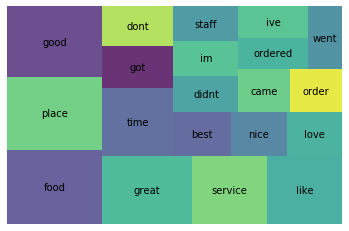

In [58]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [59]:
df['stars'].value_counts(normalize=True)

5    0.4462
4    0.2185
1    0.1496
3    0.1098
2    0.0759
Name: stars, dtype: float64

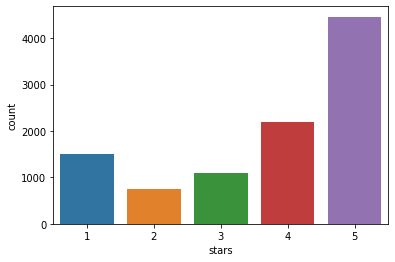

In [60]:
# Visualization 3
# Yelp star percentage of star ratings
sns.countplot(df['stars'])

## Analysis of Yelp Reviews

**Overall Positive Reviews"

A preliminary analysis shows that these Yelp reviews are mostly positive, with 45% five-star ratings and 22%  4-star ratings. About one-third of of the reviews received 3 stars or less. The top 30 terms used in reviews indicate that scores are predominantly determined by quality, wait time, and service. These reviews appear to be mostly about restaurants, though some more fine-grained analyses reveal that, at a minimum, hotels and tour services are also included. In general, it appears that people post on Yelp when they have a positive experience.  

A recommendation for further analysis is to refine the search by combining some of the top 30 terms that have similar meanings, such as "good" and "great". We would also categorize reviews so that restaurants, tours, and other services are distinguished from one another. Within categorized services, we would  determine avarage star ratings in each domain, and elminate the most common words to reveal more specific descriptors relevant in each category. For example, "food" and "chicken" are currently in the top 30 terms, but if the reviews were categorized by domain, we could limit food-related terms to restauarnt reviews, and identify other domain-specific terms in other categories. 


## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)